In [12]:
import mahotas as mh
import numpy as np
import pprint
from matplotlib import pyplot as plt
from glob import glob
from edginess import edginess_sobel

ImportError: No module named 'edginess'

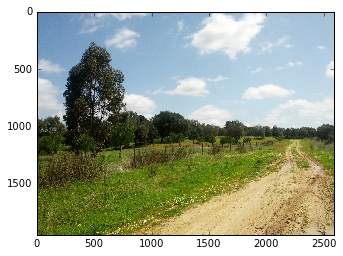

In [15]:
image = mh.imread(r"SimpleImageDataset/scene06.jpg")
plt.imshow(image)

In [16]:
# 特徴量を計算する
haralick_features = np.mean(mh.features.haralick(image), 0)
print(haralick_features)

[  2.56101889e-04   1.18504510e+03   8.88544749e-01   5.40499625e+03
   1.24346733e-01   2.80597154e+02   2.04349399e+04   8.86052868e+00
   1.37104651e+01   1.45264697e-04   5.65619358e+00  -2.55984357e-01
   9.82767145e-01]


これらの特徴量を用いてサポートベクターマシンなどの標準的なクラス分類手法を使用します。

In [17]:
basedir = 'SimpleImageDataset'


def features_for(im):
    im = mh.imread(im, as_grey=True).astype(np.uint8)
    return mh.features.haralick(im).mean(0)

In [19]:
def edginess_sobel(image):
    '''
    edgi = edginess_sobel(image)

    Measure the "edginess" of an image
    '''
    edges = mh.sobel(image, just_filter=True)
    edges = edges.ravel()
    return np.sqrt(np.dot(edges, edges))

In [29]:
features = []
sobels = []
labels = []
images = glob(r'{}/*.jpg'.format(basedir))
for im in images:
    features.append(features_for(im))
    sobels.append(edginess_sobel(mh.imread(im, as_grey=True)))
    labels.append(im[:-len('00.jpg')])

features = np.array(features)
labels = np.array(labels)

print(features)
print(labels)

[[  4.90314126e-04   1.47991751e+02   9.81662712e-01 ...,   3.88294207e+00
   -4.04937184e-01   9.98922083e-01]
 [  4.64876453e-04   1.31186593e+02   9.85951343e-01 ...,   3.71203559e+00
   -4.25120709e-01   9.99197674e-01]
 [  9.20530672e-04   3.29898445e+01   9.96884206e-01 ...,   2.98924199e+00
   -5.32291736e-01   9.99842999e-01]
 ..., 
 [  2.76929047e-03   1.74357747e+02   9.26631684e-01 ...,   3.56073387e+00
   -3.55171983e-01   9.93307199e-01]
 [  2.16862898e-03   1.07106882e+02   9.46590541e-01 ...,   3.57114530e+00
   -3.49802660e-01   9.93490420e-01]
 [  2.39994420e-03   1.11835679e+01   9.85955313e-01 ...,   2.57776871e+00
   -4.73158164e-01   9.98493426e-01]]
['SimpleImageDataset/building' 'SimpleImageDataset/building'
 'SimpleImageDataset/building' 'SimpleImageDataset/building'
 'SimpleImageDataset/building' 'SimpleImageDataset/building'
 'SimpleImageDataset/building' 'SimpleImageDataset/building'
 'SimpleImageDataset/building' 'SimpleImageDataset/building'
 'SimpleImageDa